### The original article can be found [here](http://krasserm.github.io/2018/03/19/gaussian-processes/)

# Parametric methods

Parametric methods are those methods that have a fixed number of parameters in such a model, and we infer the optimal values of those parameter. Say for line, $Y = wX+\epsilon$, the likelihood function $p(Y|X,w)$ and we infer $\hat{w}$. 

# Non-Parametric methods 

Non-parametric regression is a category of regression analysis in which the predictor does not take a predetermined form but is constructed according to information derived from the data. The Bayes’ Rule allow us to infer about the posterior distribution $p(w|y,X)$, by specifying a prior distribution, $p(w)$, on the parameter, $w$, and relocating probabilities based on evidence (i.e. observed data).

\begin{equation*} p(w|y,X) = \frac{p(Y|X,w)p(w)}{p(Y|X)}\end{equation*}

The updated distribution $p(w|y,X)$, called the $\textbf{posterior}$ distribution, thus incorporates information from both the prior distribution and the dataset. To get predictions at unseen points of interest, $x_*$, the predictive distribution can be calculated by weighting all possible predictions by their calculated posterior distribution.  

\begin{equation*} p(f_*|x_*,y,X) = \int_{w} p(f_*|x_*,w)~p(w|y,X)~dw \end{equation*}

In above equation $f_*$ is prediction label for $x_*$ test observation. 

## Gaussian Processes (GPR)

Lets assume a Gaussian process prior, specified by a mean function, $m(x)$, and covariance function, $\kappa(x, x^{\prime})$ that defines characteristics of labels $y(x)$ of the dataset.

\begin{equation*} f(𝑥) \sim GP ( m(x), \kappa(x, x^{\prime}) )
\end{equation*}

We can also incorporate independently, identically distributed Gaussian noise, $\epsilon \sim N(0, \sigma^2)$ to the labels $y(x)$, by summing the two Gaussian distributions.

$$
 \begin{align*}
  y(x) 
  &= f(x) + \epsilon\\ 
  &= GP ( m(x), \kappa(x, x^{\prime}) + \delta_{i,j}\sigma^2_y )
 \end{align*}
 $$

Here, $\kappa(x, x^{\prime})$ characterize the shape or smoothness of the distribution, and noise characterize randomness of the distribution. 
 
A Gaussian process is a random process where any point $x \in \mathbb{R}^d$ is assigned a random variable $f(x)+ \epsilon$, where the joint distribution of a finite number of these variables is itself Gaussian:
 
$$p(f \lvert X) = \mathcal{N}(f \lvert \mu, K)\tag{1}\label{eq1}$$
 
Therefore, a GP defines a prior $p(f \lvert X)$ over functions, and after having observed some function values it can be converted into a posterior $p(f \lvert X,y)$ over functions. The posterior can then be used to make predictions $f_*$ on new input $X_*$:
 
$$
 \begin{align*}
  p(f_* \lvert X_*,X,y) 
  &= \int{p(f_* \lvert X_*, f)p(f \lvert X,y)}\ d f \\ 
  &= \mathcal{N}(f_* \lvert \mu_*, \Sigma_*)\tag{2}\label{eq2}
 \end{align*}
 $$
 
Equation $(2)$ is the posterior predictive distribution which is also a Gaussian with mean $\mu_*$ and $\Sigma_*$. Since the collection of training or observed data ($y$) and predictions ($f_*$) are joint multivariate Gaussian distributed, and so we can write their distribution as follows:

$$
 \begin{pmatrix} y \\ f_*\end{pmatrix} \sim \mathcal{N}
 \left( 0,
 \begin{pmatrix}K_y & K_* \\ K_*^T & K_{**}\end{pmatrix}
 \right)\tag{3}\label{eq3}
$$
 
With $N$ training data and $N_*$ new input data, $K_y = \kappa(X,X) + \sigma_y^2 I = K + \sigma_y^2 I$ is $N \times N$, $K_* = \kappa(X,X_*)$ is $N \times N_*$ and $K_{**} = \kappa(X_*,X_*)$ is $N_* \times N_*$ matrix. The symbol $\sigma_y^2$ is the noise term in the diagonal of $\mathbf{K_y}$. It is set to zero if training targets are noise-free and to a value greater than zero if observations are noisy. The mean is set to $0$ for notational simplicity. The sufficient statistics of the posterior predictive distribution, $\mu_*$ and $\Sigma_*$, can be computed with

$$
 \begin{align*}
 \mu_* &= K_*^T K_y^{-1} y\tag{4}\label{eq4} \\
 \Sigma_* &= K_{**} - K_*^T K_y^{-1} K_*\tag{5}\label{eq5}
 \end{align*}
 $$ 
 
Since the collection of training points and test points are joint multivariate Gaussian distributed, and so we can write their distribution as follows:

From the mean ($\mu_*$) and variance ($\Sigma_*$) of the predictive posterior distribution, one can obtain a point prediction and its uncertainty. Therefore, instead of calculating the probability distribution of parameters of a function, GP calculates the probability distribution over all admissible functions that fit the data. Inference of continuous function values in this context is known as GP regression but GPs can also be used for classification. Hence it is a powerful non-linear interpolation tool.

### Reducing a  non-linear regression problem to linear regression problem

See an excellent explainationary video by Richard Turner [here](https://www.youtube.com/watch?v=92-98SYOdlY).

In the following left image, one can infer the value of $y_2$ at $y_1 = 1$ (condition) by forming the density along the slice at $y_1 = 1$,  which is another gaussian distribution. The mean $\mu_*$ is linearly dependent on the data. Now, if we do sampling operation on $y_2$ for the condition $y_1 = 1$, we get samples around the mean and speads out around the size of the width $W$ as shown in right plot.
<table>
<tr>
<td> <img src="img/gp_2D.jpg" alt="Drawing" style="width: 270px;"/> </td>
<td> <img src="img/gp_2D_sampling.jpg" alt="Drawing" style="width: 250px;"/> </td>    
</tr>
</table>

The left figure below shows that data sample can be written in a new representation, such as we can project $y_1$ and $y_2$ to a new axis which is dimensional index of the Gaussian. 

<table>
<tr>
<td> <img src="img/gp_2D_new_visulatization.jpg" alt="Drawing" style="width: 270px;"/> </td>
</tr>
</table>

One can visualze the sampling operation in this new representation, such as the bar will move together for every random sample around the mean of the gaussain, but due to correlation it can wiggle in different directions. However, if we put a condition $y_1 = 1$, then one end of it will be fixed and other will wiggle freely for samples generated along $y_1 = 1$. 

<table>
<tr>
<td> <img src="img/gp_2D_new_visulatization_20.jpg" alt="Drawing" style="width: 290px;"/> </td>
</tr>
</table>


The above plot is the visualization for a $20 \times 20$ covariance matrix, where one can see how a complex scatter data can be represented by a non-linear curve. 

<table>
<tr>
<td> <img src="img/gp_2D_new_visulatization_20_cond2.jpg" alt="Drawing" style="width: 290px;"/> </td>
<td> <img src="img/gp_2D_mean.jpg" alt="Drawing" style="width: 290px;"/> </td>
</tr>
</table>


In above left figure, values of the first two variables are fixed, and one can sample on rest of the variables. The average over all such samples will is shown in right figure, with mean and variance $\mu_*$ and $\Sigma_*$, which shows that the first few points are not so correlated, but as we move apart, the correlation increases. Now, this looks much like a non-linear regression problem.

<table>
<tr>
<td> <img src="img/gp_2D_kernel.jpg" alt="Drawing" style="width: 500px;"/> </td>
</tr>
</table>

The above plot below shows the non-linear curve for three known values of random variables, which looks like a Guassian distribution. The kernel, $K(X_1, X_2)$ has variance $\sigma$ and is multiplied by a Gaussain term, such that it generates infinitesimal points in space based on size of $X_1$ and $X_2$. 


<table>
<tr>
<td> <img src="img/gp_2D_kernel_smooth.jpg" alt="Drawing" style="width: 520px;"/> </td>
</tr>
</table>

Now in above plot the covariance matrix has infinte number of dimensions that we intergate over. For regression, the input value $X$ can have now decimal values. So, now a non-parametric function is transformed into a parametric function.

## Implementation with NumPy

Here, we will use the squared exponential kernel, also known as Gaussian kernel or RBF kernel or $\textbf{bivariate normal joint density function}$:
 
 $$
 \kappa(x_i,x_j) = \sigma_f^2 \exp(-\frac{1}{2l^2}
   (x_i - x_j)^T
   (x_i - x_j))\tag{6}
 $$

 The length parameter $l$ controls the smoothness of the function and $\sigma_f$ the vertical variation. For simplicity, we use the same length parameter $l$ for all input dimensions (isotropic kernel). 

In [3]:
import numpy as np

def kernel(X1, X2, l=2.0, sigma_f=1.0):
    '''
    Isotropic squared exponential kernel. Computes a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d).
        X2: Array of n points (n x d).

    Returns:
        Covariance matrix (m x n).
    ''' 
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T) # (m x n) matrix
    return sigma_f**2 * np.exp(-0.5 / l**2 * sqdist)

### Prior

Let's first define a prior over functions with mean zero and a covariance matrix computed with kernel parameters $l=1$ and $\sigma_f=1$. To draw random functions from that GP we draw random samples from the corresponding multivariate normal. The following example draws three random samples and plots it together with the zero mean and the 95% confidence interval (computed from the diagonal of the covariance matrix).

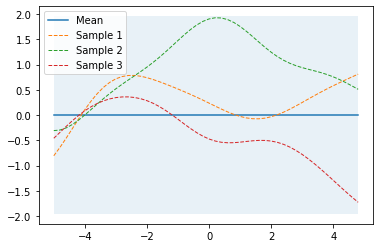

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

from gaussian_processes_util import plot_gp #*

def plot_scatter(mu, cov, X):
    mu_val  =  mu.ravel()[0]
    sig_val =  cov.item((0,0))
    cor_coeff =  cov.item((0,X.shape[0]-1))
    plt.scatter(X, X, color='red', s=10, marker='o', label="$\mu$ ="+str(mu_val)+
                ", $\sigma$ ="+str(round(sig_val,2))+", corr-coeff ="+str(round(cor_coeff,2)))
    plt.legend(loc='upper left')
    plt.show()

# Finite number of (50) points b/w -5 and 5 in a column
X = np.arange(-5.0, 5.0, 0.2).reshape(-1, 1)
#print ('X', X)

# Mean and covariance of the prior
mu = np.zeros(X.shape) 
cov = kernel(X, X)
#print ('mean:\n', mu, '\n cov: \n', cov)

# Draw three samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

#print (samples)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, samples=samples)

### Prediction from noise-free training data

To compute the sufficient statistics i.e. mean and covariance of the posterior predictive distribution we implement Equations $(4)$ and $(5)$ and apply them to noise-free training data `X_train` and `Y_train`. The following example draws three samples from the posterior predictive and plots them along with the mean, confidence interval and training data. In a noise-free model, variance ($\sigma_y$) at the training points is zero and all random functions drawn from the posterior go through the trainig points.

In [31]:
from numpy.linalg import inv

def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    '''
    Computes the suffifient statistics of the GP posterior predictive distribution 
    from m training data X_train and Y_train and n new inputs X_s.
    
    Args:
        X_s: New input locations (n x d).
        X_train: Training locations (m x d).
        Y_train: Training targets (m x 1).
        l: Kernel length parameter.
        sigma_f: Kernel vertical variation parameter.
        sigma_y: Noise parameter.
    
    Returns:
        Posterior mean vector (n x d) and covariance matrix (n x n).
    '''
    K = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f) + 1e-8 * np.eye(len(X_s))
    K_inv = inv(K)
    
    # Equation (4)
    mu_s = K_s.T.dot(K_inv).dot(Y_train)

    # Equation (5)
    cov_s = K_ss - K_s.T.dot(K_inv).dot(K_s)
    
    return mu_s, cov_s

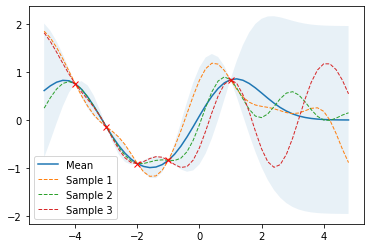

In [34]:
# Noise free training data
X_train = np.array([-4, -3, -2, -1, 1]).reshape(-1, 1)
Y_train = np.sin(X_train)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

All the training points passes throught the mean.

### Prediction from noisy training data
 
If some noise is included in the model, training points are only approximated and the variance at the training points is non-zero.

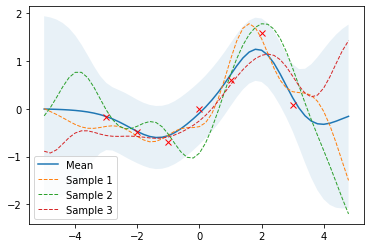

In [26]:
noise = 0.4

# Noisy training data
X_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y_train = np.sin(X_train) + noise * np.random.randn(*X_train.shape)

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=noise)

samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)


Not all the training points passes throught the mean.

### Effect of kernel parameters and noise parameter
 
The following example shows the effect of kernel parameters $l$ and $\sigma_f$ as well as the noise parameter $\sigma_y$. Higher $l$ values lead to smoother functions and therefore to coarser approximations of the training data. Lower $l$ values make functions more wiggly with wide confidence intervals between training data points. $\sigma_f$ controls the vertical variation of functions drawn from the GP. This can be seen by the wide confidence intervals outside the training data region in the right figure of the second row. $\sigma_y$ represents the amount of noise in the training data. Higher $\sigma_y$ values make more coarse approximations which avoids overfitting to noisy data.

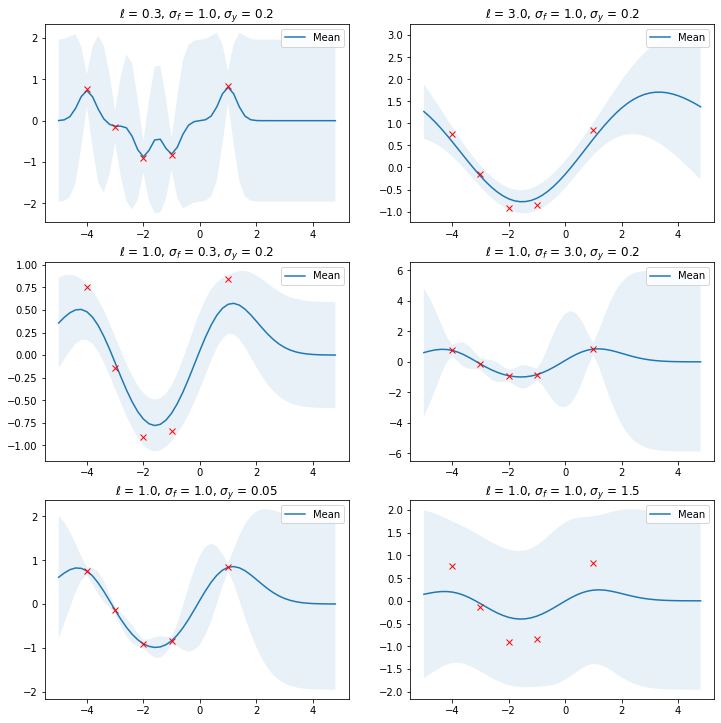

In [24]:
import matplotlib.pyplot as plt

# l, sigma_f, sigma_l
params = [
    (0.3, 1.0, 0.2),
    (3.0, 1.0, 0.2),
    (1.0, 0.3, 0.2),
    (1.0, 3.0, 0.2),
    (1.0, 1.0, 0.05),
    (1.0, 1.0, 1.5),
]

plt.figure(figsize=(12, 5))

for i, (l, sigma_f, sigma_y) in enumerate(params):
    mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l, 
                                       sigma_f=sigma_f, 
                                       sigma_y=sigma_y)
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(top=2)
    plt.title(f'$\ell$ = {l}, $\sigma_f$ = {sigma_f}, $\sigma_y$ = {sigma_y}')
    plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)


### Optimization of Parameters
Optimal values for these parameters can be estimated by maximizing the marginal log-likelihood which is given by

 $$
 \log p(\mathbf{y} \lvert \mathbf{X}) = 
 \log \mathcal{N}(\mathbf{y} \lvert \boldsymbol{0},\mathbf{K}_y) =
 -\frac{1}{2} \mathbf{y}^T \mathbf{K}_y^{-1} \mathbf{y} 
 -\frac{1}{2} \log \begin{vmatrix}\mathbf{K}_y\end{vmatrix} 
 -\frac{N}{2} \log(2\pi) \tag{7}
 $$
 
 In the following we will minimize the negative marginal log-likelihood w.r.t. parameters $l$ and $\sigma_f$, $\sigma_y$ is set to the known noise level of the data. If the noise level is unknown, $\sigma_y$ can be estimated as well along with the other parameters. 


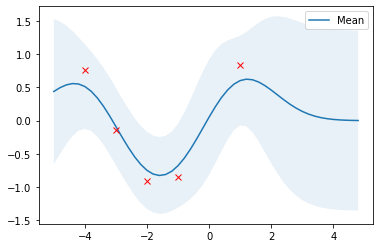

In [40]:
from numpy.linalg import cholesky
from scipy.optimize import minimize

def nll_fn(X_train, Y_train, noise):
    '''
    Returns a function that computes the negative log-likelihood
    for training data X_train and Y_train and given noise level.
    
    Args:
        X_train: training locations (m x d).
        Y_train: training targets (m x 1).
        noise: known noise level of Y_train.
        
    Returns:
        Minimization objective.
    '''
    #print ('theta', theta)
    def step(theta):
        #print ('theta', theta)
        K = kernel(X_train, X_train, l=theta[0], sigma_f=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        # Compute determinant via Cholesky decomposition
        return np.sum(np.log(np.diagonal(cholesky(K)))) + \
               0.5 * Y_train.T.dot(inv(K).dot(Y_train)) + \
               0.5 * len(X_train) * np.log(2*np.pi)
    return step

# Minimize the negative log-likelihood w.r.t. parameters l and sigma_f.
# We should actually run the minimization several times with different
# initializations to avoid local minima but this is skipped here for
# simplicity.

res = minimize(nll_fn(X_train, Y_train, noise), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

# Store the optimization results in global variables so that we can
# compare it later with the results from other implementations.
l_opt, sigma_f_opt = res.x
l_opt, sigma_f_opt

# Compute the prosterior predictive statistics with optimized kernel parameters and plot the results
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, l=l_opt, sigma_f=sigma_f_opt, sigma_y=noise)
plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

With optimized kernel parameters, training data are reasonably covered by the 95% confidence interval and the mean of the posterior predictive is a good approximation.